# 

# ÜLKELERİN FAKTÖRLERE DAYALI SÜRDÜRÜLEBİLİR TARIMSAL ÇIKTILARININ  MAKİNE ÖĞRENİMİ İLE TAHMİNİ

PROJENİN AMACI: PROJEMİZİN AMACI ÜLKELERİN SAHİP OLDUKLARI TARIM ARAZİSİ, KIRSAL NÜFUSU VE TOPLAM YAPTIKLARI TARIM YATIRIMLARININ TARIMSAL ÇIKTISI ÜZERİNDE NE KADAR ETKİSİ OLUP OLMADIĞINI TAHMİNLEMEYE DAYANARAK MAKİNE ÖĞRENMESİ ARACILIĞIYLA ANALİZ ETMEKTİR.

KULLANACAĞIMIZ KÜTÜPHANELERİ ÇAĞIRALIM.

In [8]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt


OLUŞTURDUĞUMUZ VERİ SETİNİ EKLEYELİM VE İLK 5 İLE SON 5 DEĞERİMİZİ GÖRELİM, AYRICA İSİMLENDİRME YAPALIM.
TARIM ARAZİSİ DEĞİKENİ: FAOSTAT, ARAZİ KULLANIM ALANI ULUSAL,BÖLGESEL VE KÜRESEL DÜZEYDE TARIM FAALİYETLERİNİN İZLENMESİYLE
OLUŞTURULMUŞTUR. BİRİMİ BİN ALAN HEKTARI CİNSİNDEN.
KIRSAL NÜFUS DEĞİKENİ: FAOSTAT NÜFUS MODÜLÜ, CİNSİYETE VE KENTSEL/KIRSALA GÖRE NÜFUSLA İLGİLİ ZAMAN SERİSİ VERİLERİNİ İÇERİR.
TARIM YATIRIMI DEĞİŞKENİ: TARIMA YAPILAN YATIRIMLARLA İLGİLİ BİLGİLERİN GENEL BİR GÖRÜNÜMÜNÜ SAĞLAR. DAHİL EDİLEN BİLGİLER, TARIMA
YÖNELİK MERKEZİ HÜKÜMET HARCAMALARI, TARIMA VERİLEN KREDİLER, RESMİ KALKINMA AKIŞLARI (TAAHHÜTLER) VE TARIMA DOĞRUDAN YABANCI
YATIRIM SEVİYELERİ İLE İLGİLİDİR. BİRİMİ ABD DOLARI MİLYON ŞEKLİNDEDİR.
TARIMSAL ÇIKTI DEĞİŞKENİ: TARIMSAL MAHSÜL VE HAYVANCILIK ÜRÜNLERİNİN TOPLAM DEĞERİDİR. BİRİMİ ABD DOLARI ŞEKLİNDEDİR.

In [9]:
data = pd.read_excel("FAOSTAT verileri.xls")
data = data.rename(columns = { "Area": "Ulke", 
                              "Year" : "YIL",
                              "Unit" : "Birim"
                              
                             })

data

,Ulke,YIL,Birim,Tarım arazisi,Kırsal Nüfus,Tarım Yatırımı,Tarımsal Çıktı
0,Australia,2010,1000 ha,376372.0000,3277.7720,2665.665013,36088805000
1,Australia,2011,1000 ha,396121.0000,3304.4680,2626.195605,38843594000
2,Australia,2012,1000 ha,387076.0000,3331.6390,3056.530181,41499546000
3,Australia,2013,1000 ha,371775.0000,3356.4050,2218.482709,41579792000
4,Australia,2014,1000 ha,374423.0000,3379.9030,2277.883193,42740032000
...,...,...,...,...,...,...,...
105,United States of America,2015,1000 ha,404718.7000,58641.3510,21500.000000,352330463000
106,United States of America,2016,1000 ha,405264.6000,58436.2930,22700.000000,381464871000
107,United States of America,2017,1000 ha,405810.3538,58215.9470,22000.000000,372934314000
108,United States of America,2018,1000 ha,405810.3538,57980.0340,24600.000000,376625993000


DEĞİŞKEN TİPLERİNE BAKIP VERİYİ ANLAMA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ulke            110 non-null    object 
 1   YIL             110 non-null    int64  
 2   Birim           110 non-null    object 
 3   Tarım arazisi   110 non-null    float64
 4   Kırsal Nüfus    110 non-null    float64
 5   Tarım Yatırımı  110 non-null    float64
 6   Tarımsal Çıktı  110 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 6.1+ KB


## VERİ SETİNİN İSTATİSTİKSEL GÖZLEMİ

DEĞİŞKENLERİN İSTATİSTİKSEL ÖZETİNİ GÖRELİM

In [11]:
data.describe()

,YIL,Tarım arazisi,Kırsal Nüfus,Tarım Yatırımı,Tarımsal Çıktı
count,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,2014.500000,224561.214079,162271.928741,7213.629668,2.065125e+11
std,2.885427,146934.714585,286961.489323,7917.127462,2.705689e+11
min,2010.000000,37716.000000,3277.772000,277.374554,1.133829e+10
25%,2012.000000,96349.250000,7775.284625,889.582232,4.240503e+10
50%,2014.500000,215494.000000,29467.831500,5147.405644,6.804215e+10
75%,2017.000000,356201.000000,91355.390500,8917.686066,3.331819e+11
max,2019.000000,528916.800000,893272.090000,34000.000000,1.026882e+12


VERİ SETİNDE EKSİK VERİ KONTROLÜ

In [12]:
data.isnull().sum().sum(),
data.isnull().sum()

Ulke              0
YIL               0
Birim             0
Tarım arazisi     0
Kırsal Nüfus      0
Tarım Yatırımı    0
Tarımsal Çıktı    0
dtype: int64

# TARIMSAL ÇIKTI KUTU GRAFİĞİ

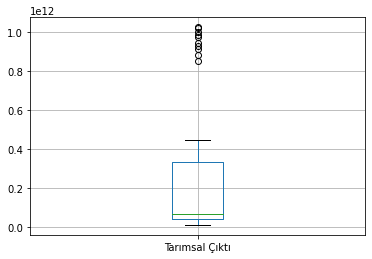

In [39]:
box1=data.boxplot(column=["Tarımsal Çıktı"])

### ÜLKELERİN TARIMSAL ÇIKTI DEĞERLERLERİNİN PASTA GRAFİĞİ İLE GÖSTERİLMESİ

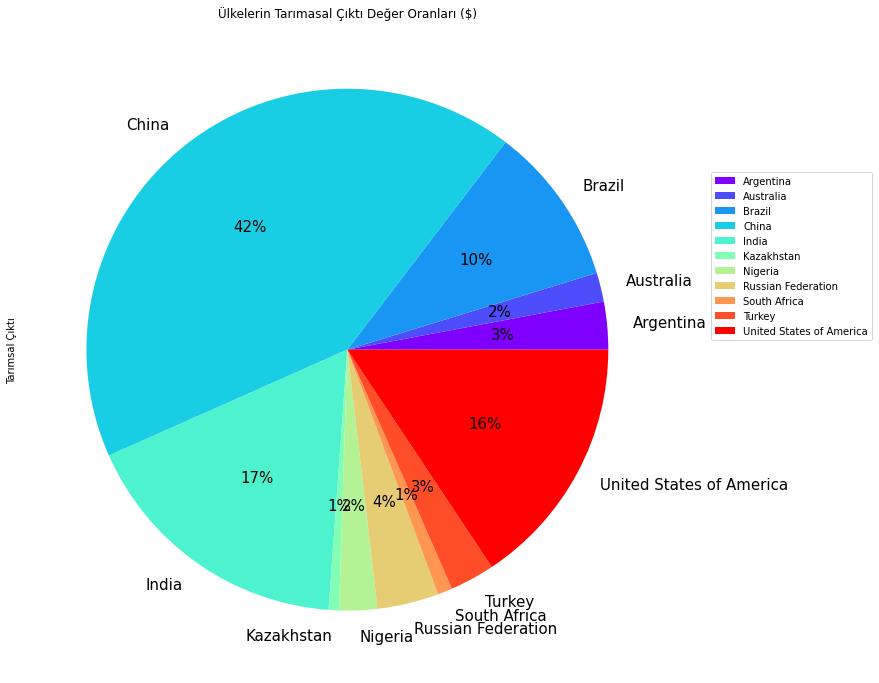

In [13]:
data.groupby(['Ulke']).sum().plot(figsize = (20,12),kind='pie', y='Tarımsal Çıktı', autopct='%1.0f%%',
                                 cmap = "rainbow",
                                title='Ülkelerin Tarımasal Çıktı Değer Oranları ($)',textprops={'fontsize': 15})
plt.legend(loc = "upper left", bbox_to_anchor = (1.05,0.78))
plt.show()

### BAR GRAFİĞİ İLE ÜLKERLERİN TARIMSAL ÇIKTI (BAĞIMLI DEĞİŞKEN) DEĞERLERİNİN GÖSTERİLMESİ

<AxesSubplot:xlabel='Ulke', ylabel='Tarımsal Çıktı'>

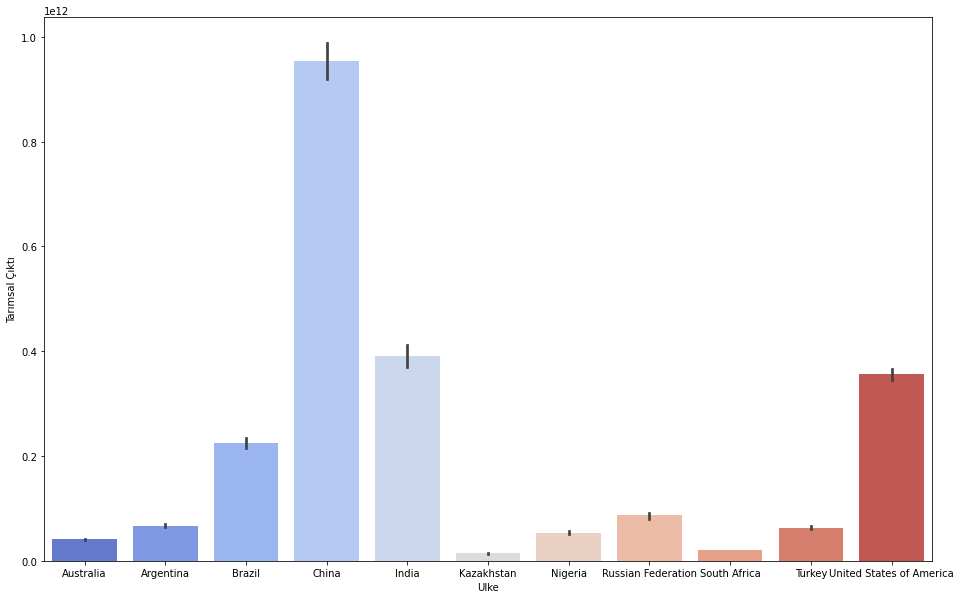

In [38]:
plt.figure(figsize=(35,10))
ax1 = plt.subplot(1,2,1)
sns.barplot(x="Ulke", y="Tarımsal Çıktı", data=data, palette="coolwarm", ax=ax1)

### DEĞİŞKENLERİN FARKLI GRAFİKLER ÜZERİNDEN ANLAMLILIĞININ KONTROLÜ

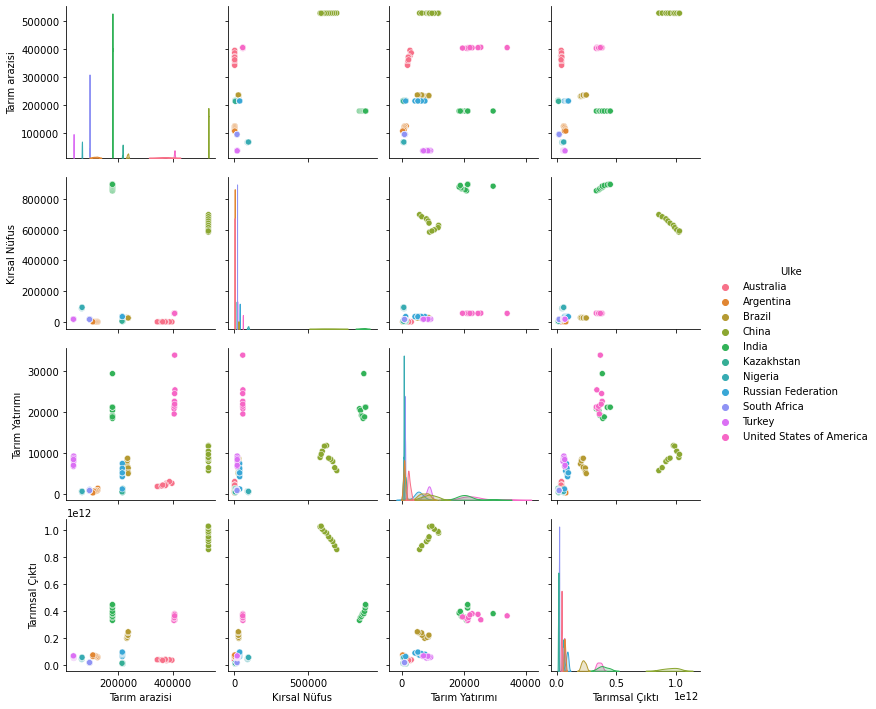

In [14]:
dat2 = data.copy()
dat2 = dat2.drop(["YIL"], axis = 1)
sns.pairplot(dat2, hue = "Ulke")
plt.show()

## DEĞİŞKENLERİN GRAFİKLERİNE REGRESSİON DOĞRUSU İLE GÖZLEMLENMESİ

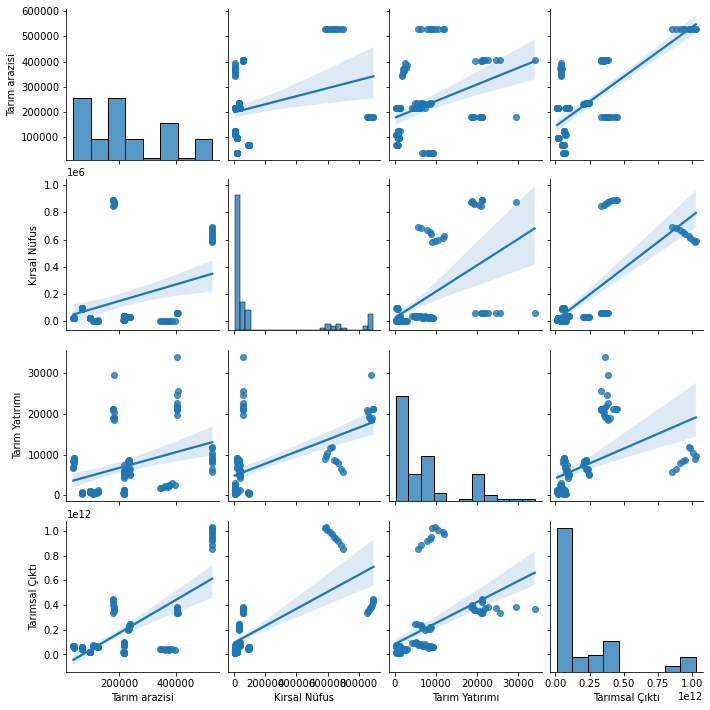

In [15]:
dat2 = data.copy()
dat2 = dat2.drop(["YIL"], axis = 1)
sns.pairplot(dat2,kind = "reg")
plt.show()

# BAR GRAFİĞİ İLE BAĞIMSIZ DEĞİŞKENLERİN GÖSTERİMİ

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


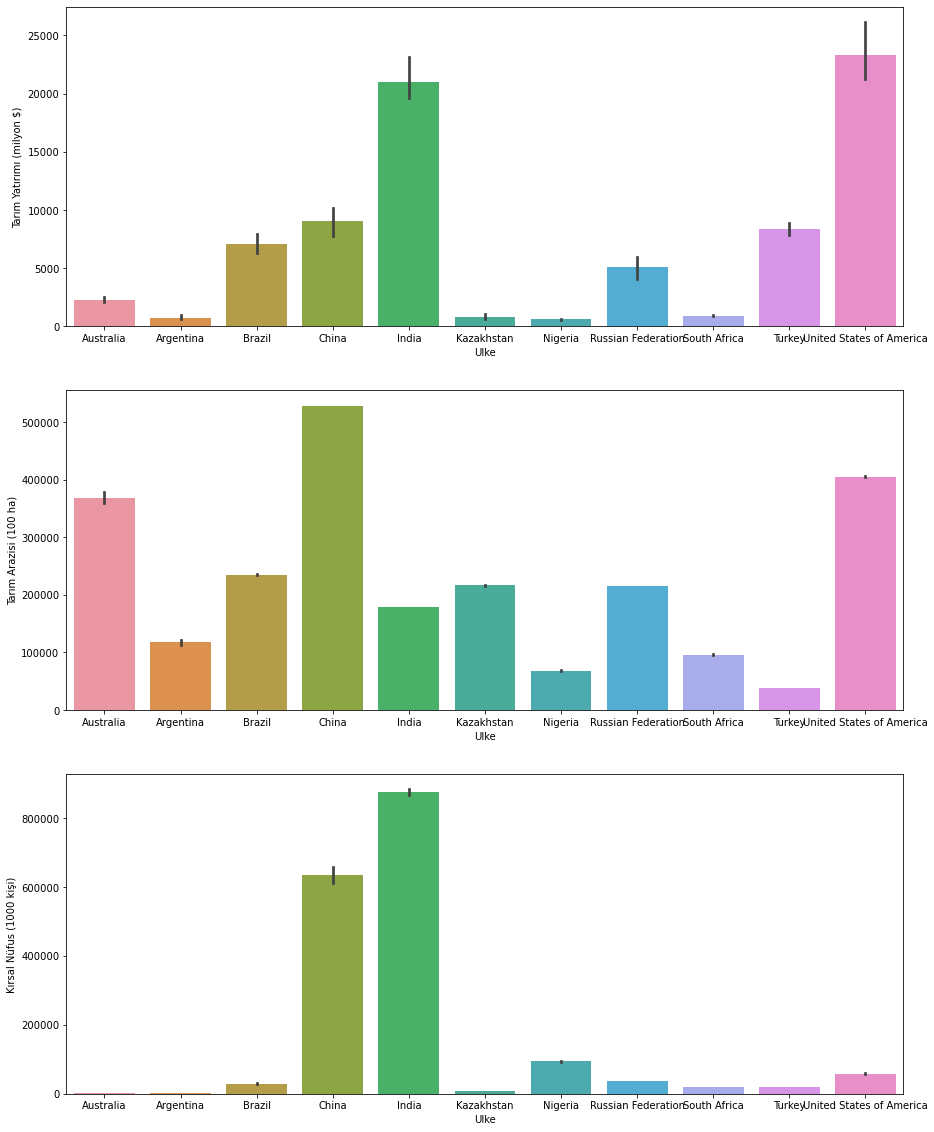

In [37]:
fig, ax = plt.subplots(3,1, figsize=(15,20))
sns.barplot(data.Ulke, data["Tarım Yatırımı"],ax=ax[0])
ax[0].set(ylabel="Tarım Yatırımı (milyon $)")
sns.barplot(data.Ulke, data["Tarım arazisi"],ax=ax[1])
ax[1].set(ylabel="Tarım Arazisi (100 ha)")
sns.barplot(data.Ulke, data["Kırsal Nüfus"],ax=ax[2])
ax[2].set(ylabel="Kırsal Nüfus (1000 kişi)")
plt.show()
    

# KIRSAL NÜFUS VE TARIM ARAZİSİ DEĞERLERİNİN BAR GRAFİĞİ

<Figure size 4320x720 with 0 Axes>

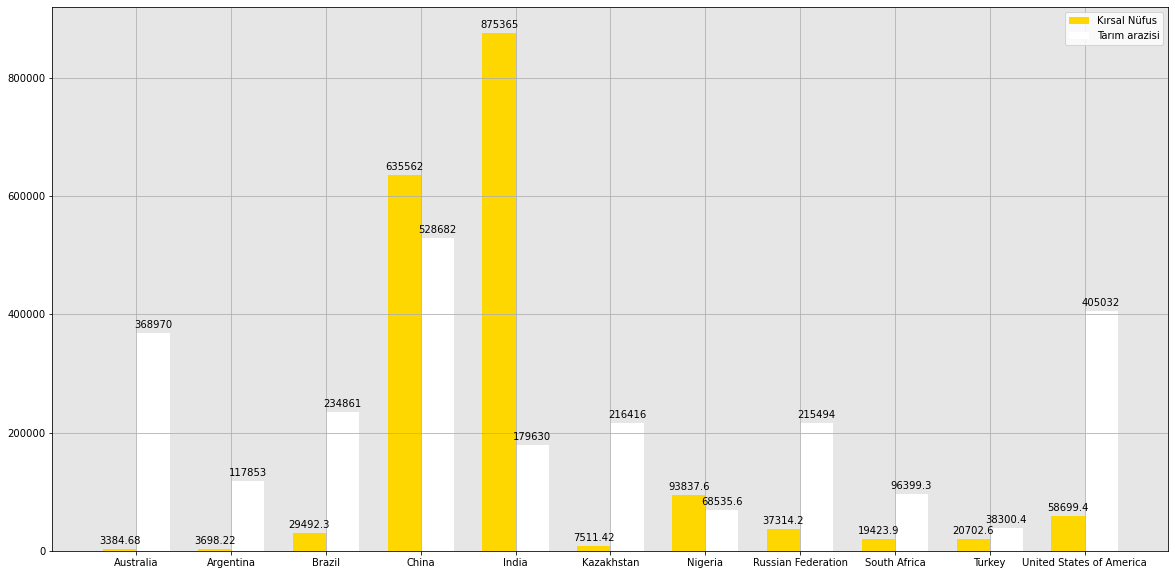

In [19]:
plt.figure(figsize= (60,10))
labels = data.Ulke.unique()
x_labels = np.arange(len(labels))
fig, ax = plt.subplots(figsize= (20,10))

nufus = []
arazi = []

for i in labels:
    nufus.append(data.loc[data.Ulke == i,"Kırsal Nüfus"].mean())
    arazi.append(data.loc[data.Ulke == i,"Tarım arazisi"].mean())
   
    
nufus = plt.bar(x_labels - 0.35/2, nufus, 0.35, label='Kırsal Nüfus',color ="gold")
arazi = plt.bar(x_labels + 0.35/2, arazi, 0.35, label='Tarım arazisi', color = "white")


plt.xticks(x_labels, labels)
plt.legend()
plt.bar_label(nufus, padding=3)
plt.bar_label(arazi, padding=3)

plt.grid()
plt.gca().patch.set_facecolor('0.9')
plt.show()

# TARIM YATIRIMININ YILLARA GÖRE ÇİZGİ GRAFİĞİ

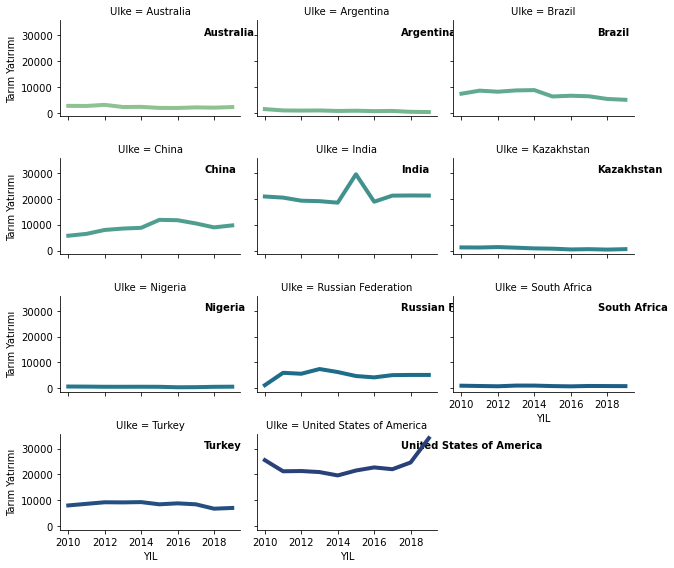

In [20]:
g = sns.relplot(
    data=data,
    x="YIL",y="Tarım Yatırımı", col="Ulke", hue="Ulke",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
for year, ax in g.axes_dict.items():
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
plt.show()

# TARIM ARAZİSİNİN YILLARA GÖRE ÇİZGİ GRAFİĞİ

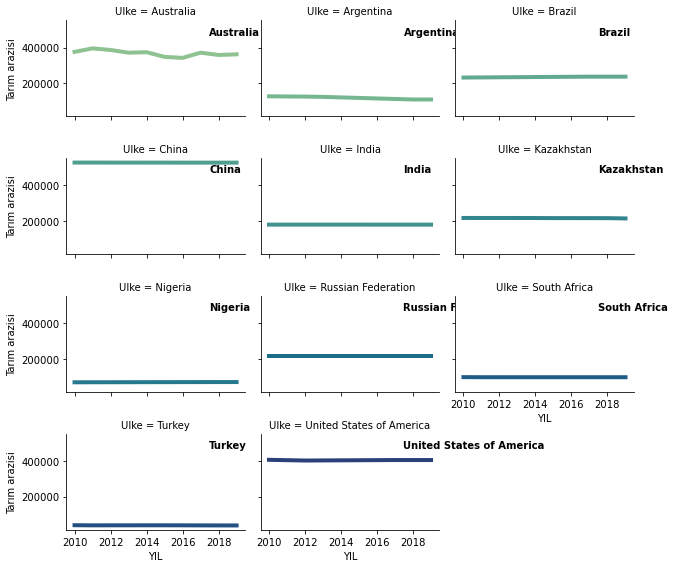

In [21]:
g = sns.relplot(
    data=data,
    x="YIL",y="Tarım arazisi", col="Ulke", hue="Ulke",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
for year, ax in g.axes_dict.items():
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
plt.show()

### VERİ SETİNDE KORELASYON KATSAYILARINA BAKILARAK DEĞİŞKENLER ARASINDAKİ ANLAMLIĞIN ÖLÇÜLMESİ

<AxesSubplot:>

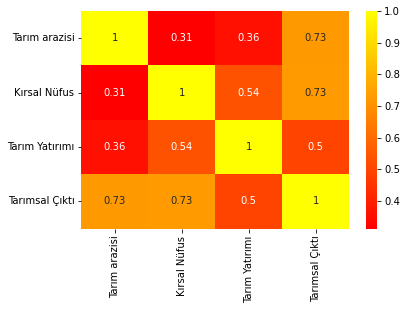

In [22]:
data_kor = data.copy()
data_kor = data_kor.drop(["YIL"], axis = 1)
kor = data_kor.corr()
sns.heatmap(kor, cmap = "autumn", annot=True)

# VERİ SETİNDEN BAĞIMLI DEĞİŞKEN(TARIMSAL ÇIKTI),BİRİM VE YIL GİBİ SÜTUNLARIN ÇIKARILMASI.

In [23]:
data3 = data.copy()

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data3.iloc[:,3:7] = min_max.fit_transform(data3.iloc[:,3:7])
data3

,Ulke,YIL,Birim,Tarım arazisi,Kırsal Nüfus,Tarım Yatırımı,Tarımsal Çıktı
0,Australia,2010,1000 ha,0.689445,0.000000,0.070822,0.024372
1,Australia,2011,1000 ha,0.729651,0.000030,0.069651,0.027084
2,Australia,2012,1000 ha,0.711237,0.000061,0.082412,0.029700
3,Australia,2013,1000 ha,0.680086,0.000088,0.057561,0.029779
4,Australia,2014,1000 ha,0.685477,0.000115,0.059322,0.030921
...,...,...,...,...,...,...,...
105,United States of America,2015,1000 ha,0.747154,0.062207,0.629329,0.335773
106,United States of America,2016,1000 ha,0.748265,0.061976,0.664913,0.364461
107,United States of America,2017,1000 ha,0.749377,0.061729,0.644156,0.356061
108,United States of America,2018,1000 ha,0.749377,0.061464,0.721255,0.359697


In [25]:
x = data3.drop(["Ulke","YIL","Birim","Tarımsal Çıktı"], axis=1)
x

,Tarım arazisi,Kırsal Nüfus,Tarım Yatırımı
0,0.689445,0.000000,0.070822
1,0.729651,0.000030,0.069651
2,0.711237,0.000061,0.082412
3,0.680086,0.000088,0.057561
4,0.685477,0.000115,0.059322
...,...,...,...
105,0.747154,0.062207,0.629329
106,0.748265,0.061976,0.664913
107,0.749377,0.061729,0.644156
108,0.749377,0.061464,0.721255


# DEĞİŞKENLERE NORMALİZASYON YAPILMASI

# BAĞIMLI DEĞİŞKENİN AYRILMASI

In [26]:
data3 = data3.rename(columns = { "Tarımsal Çıktı": "Tarımsal_Çıktı"})
y = data3["Tarımsal_Çıktı"]


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg = LinearRegression()
rf = RandomForestRegressor()

reg.fit(x_train,y_train)
rf.fit(x_train,y_train)

print(reg.score(x_test, y_test))
print(rf.score(x_test, y_test))

0.6951194069699306
0.9976382724879965


In [29]:
acc = []
for i in range(1,300):
    rf = RandomForestRegressor(i, random_state=10)
    rf.fit(x_train,y_train)
    acc.append(rf.score(x_test,y_test))

# DOĞRULUĞU GRAFİKTE GÖSTERME

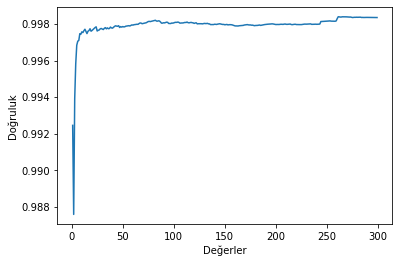

<Figure size 936x576 with 0 Axes>

In [30]:
plt.plot(range(1,300),acc)
plt.xlabel("Değerler")
plt.ylabel("Doğruluk")
plt.figure(figsize=[13,8])
plt.show()

# EN İYİ SKORU VEREN SIRA

In [31]:
print(f"RandomForestRegressor = {1+acc.index(np.max(acc))}")

RandomForestRegressor = 267


In [32]:
 rf = RandomForestRegressor(267, random_state=0)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9988157243304084

# REGRESYON DOĞRUSU İLE GÖSTERİMİ


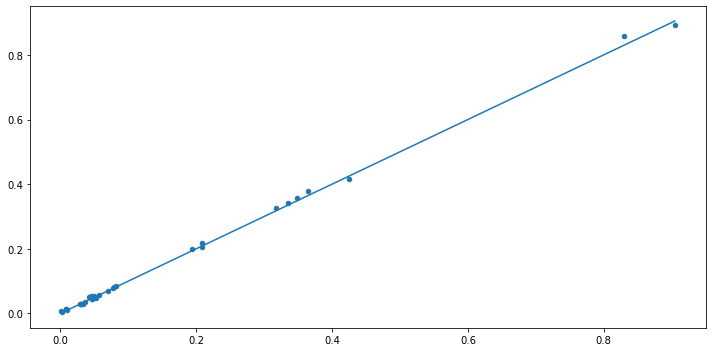

In [33]:
y_pred = rf.predict(x_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

# GERÇEK İLE TAHMİN DEĞERLERİNİN GRAFİĞİ


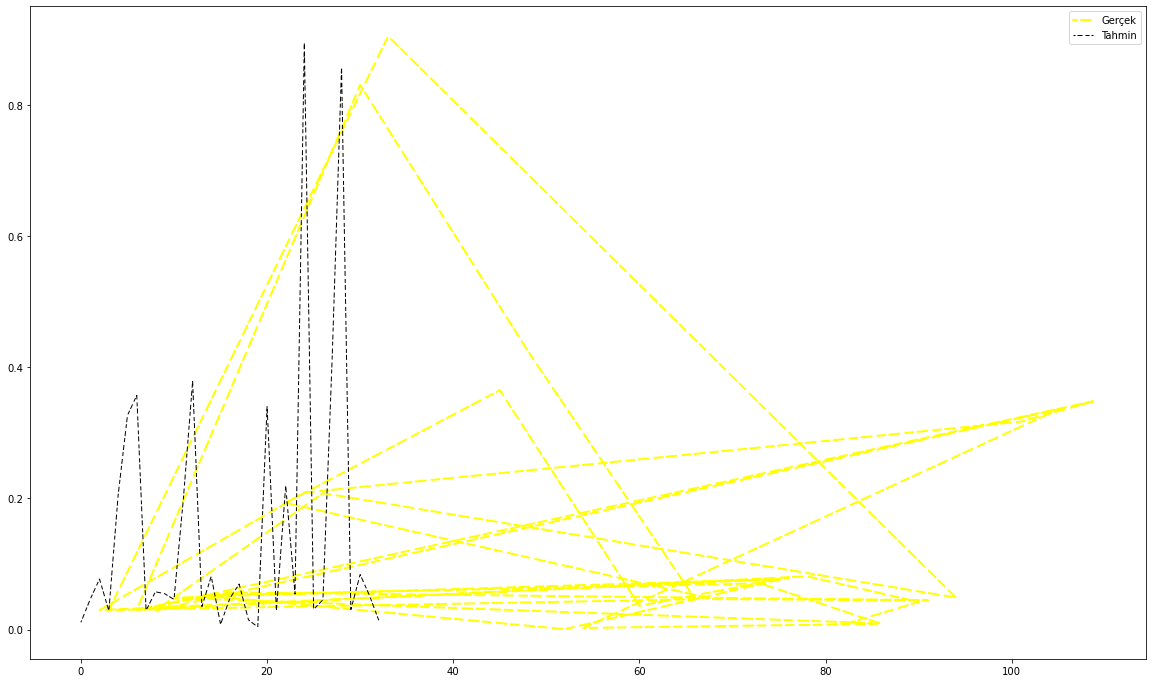

In [34]:
plt.figure(figsize=(20,12))
plt.plot(y_test,label="Gerçek", c = "yellow",linewidth=2, linestyle=(10, (5, 3, 4, 2)), dash_capstyle='round')
plt.plot(y_pred,label ="Tahmin",c = "black", linewidth=1, linestyle=(10, (5, 3, 4, 2)), dash_capstyle='butt')
plt.legend()
plt.show()

# HATA DEĞERLERİNİN GÖSTERİMİ

In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.005186154500526655
Mean Squared Error: 5.590526353923822e-05
Root Mean Squared Error: 0.007476982248155884


In [36]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Tarımsal_Çıktı   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              159.3
Date:                Mon, 09 May 2022   Prob (F-statistic):                    3.32e-32
Time:                        19:49:31   Log-Likelihood:                          48.790
No. Observations:                  77   AIC:                                     -91.58
Df Residuals:                      74   BIC:                                     -84.55
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------